# Import Libraries

In [82]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

### Load data for KMeans. The dataset contains season sumamries from 1970-2019

In [83]:
nfl = pd.read_csv("SeasonSummary_1970_2019.csv", index_col=0)

### Convert the dataframe to an array


In [84]:
nfl_arr = nfl.to_numpy()

### Elbow Method to determine the number of clusters

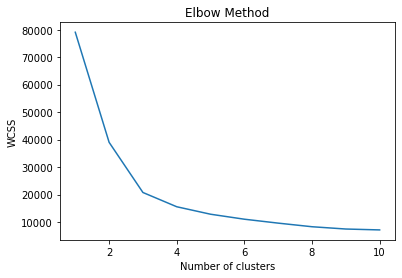

In [85]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(nfl_arr)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Plot the 3 clusters

In [86]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=500, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(nfl_arr)

### Use colors variable to color dots based on the assigned eras

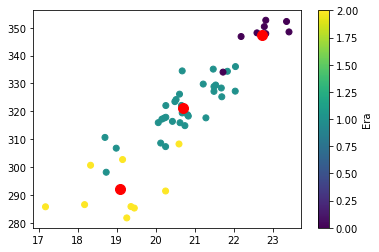

In [87]:
colors = [2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0]
plt.scatter(nfl_arr[:,0], nfl_arr[:,1],c=colors)
cbar = plt.colorbar()
cbar.set_label('Era')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.show()

### Save the prediction

In [88]:
clusters = pd.DataFrame(data=pred_y.flatten(), columns=['Era'])

### Set nfl index back to column


In [89]:
nfl.reset_index(level=0, inplace=True)

### Add clusters back into the season summary

In [90]:
nfl = pd.concat([clusters, nfl], axis=1)

### Replace 0,1,2 with year ranges

In [91]:
nfl["Era"].replace({0: '2011-2019', 1:'1979-2010', 2:'1970-1978'}, inplace=True)

# Summary of Averages by Cluster

### Average yards

In [92]:
nfl_avg_yards = nfl.groupby('Era', as_index=False)['Yards'].mean()
print(nfl_avg_yards)

         Era       Yards
0  1970-1978  292.035516
1  1979-2010  321.115039
2  2011-2019  347.540972


### Average pass yards

In [93]:
nfl_avg_pass = nfl.groupby('Era', as_index=False)['PassYards'].mean()
print(nfl_avg_pass)

         Era   PassYards
0  1970-1978  153.210516
1  1979-2010  204.880534
2  2011-2019  235.087500


### Average rush yards

In [94]:
nfl_avg_rush = nfl.groupby('Era', as_index=False)['RushYards'].mean()
print(nfl_avg_rush)

         Era   RushYards
0  1970-1978  138.824107
1  1979-2010  116.234462
2  2011-2019  112.454167


# Plot the data

In [96]:
import matplotlib.pyplot as plt

### Bar Plot for Yards Gained

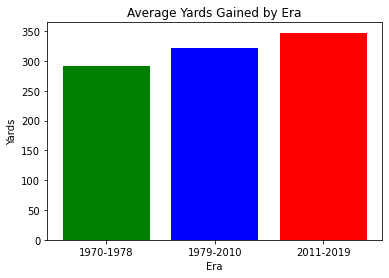

In [99]:
plt.bar(nfl_avg_yards['Era'],nfl_avg_yards['Yards'],align='center',color=['green','blue','red'])
plt.xticks([0,1,2],nfl_avg_yards['Era'])
plt.xlabel('Era')
plt.ylabel('Yards')
plt.title('Average Yards Gained by Era')
plt.show()

### Bar Plot for Passing

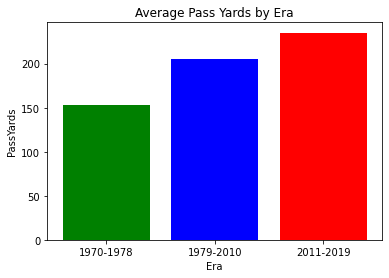

In [100]:
plt.bar(nfl_avg_pass['Era'],nfl_avg_pass['PassYards'],align='center',color=['green','blue','red'])
plt.xticks([0,1,2],nfl_avg_pass['Era'])
plt.xlabel('Era')
plt.ylabel('PassYards')
plt.title('Average Pass Yards by Era')
plt.show()

### Bar Plot for Rushing

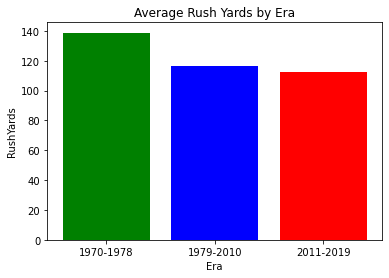

In [101]:
plt.bar(nfl_avg_rush['Era'],nfl_avg_rush['RushYards'],align='center',color=['green','blue','red','black'])
plt.xticks([0,1,2],nfl_avg_rush['Era'])
plt.xlabel('Era')
plt.ylabel('RushYards')
plt.title('Average Rush Yards by Era')
plt.show()

### Barplot to show percentage of runs vs passes

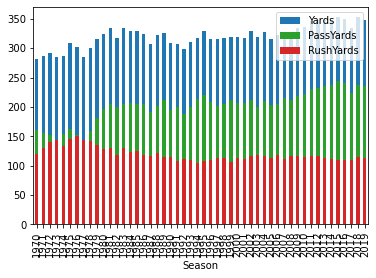

In [28]:
ax = nfl.plot(x="Season", y="Yards", kind="bar")
nfl.plot(x="Season", y="PassYards", kind="bar", ax=ax, color="C2")
nfl.plot(x="Season", y="RushYards", kind="bar", ax=ax, color="C3")
plt.show()

### Line to show run and pass yards over years

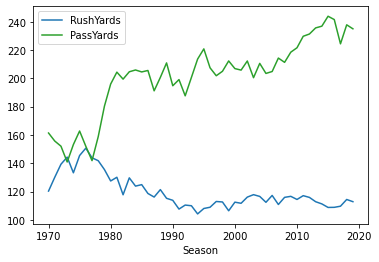

In [76]:
ax = nfl.plot(x="Season", y="RushYards", kind="line")
nfl.plot(x="Season", y="PassYards", kind="line", ax=ax, color="C2")
plt.show()

### Insert new column to calculate how much rushing and passing yards contributes to overall yardage

In [30]:
nfl['RunPercent'] = nfl['RushYards']/nfl['Yards']
nfl['PassPercent'] = nfl['PassYards']/nfl['Yards']

### Plot the percentages over years. 

In [78]:
#ax1 = nfl.plot(x="Season", y="RunPercent", kind="line")
#nfl.plot(x="Season", y="PassPercent", kind="line", ax=ax1, color="C2")
#plt.show()

### Plot the number of turnovers over the years


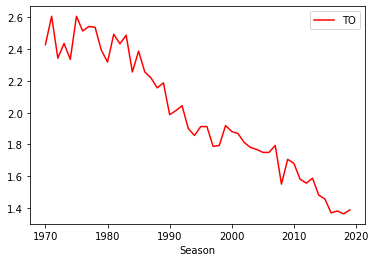

In [77]:
nfl.plot(x="Season", y="TO", kind="line", color="red")
plt.show()

### Plot the number of points scored over the years


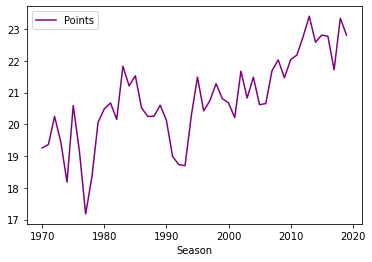

In [80]:
nfl.plot(x="Season", y="Points", kind="line", color="purple")
plt.show()

# Read in new dataframe called Modern for outlier detection during modern era


In [102]:
modern = pd.read_csv('Modern.csv')

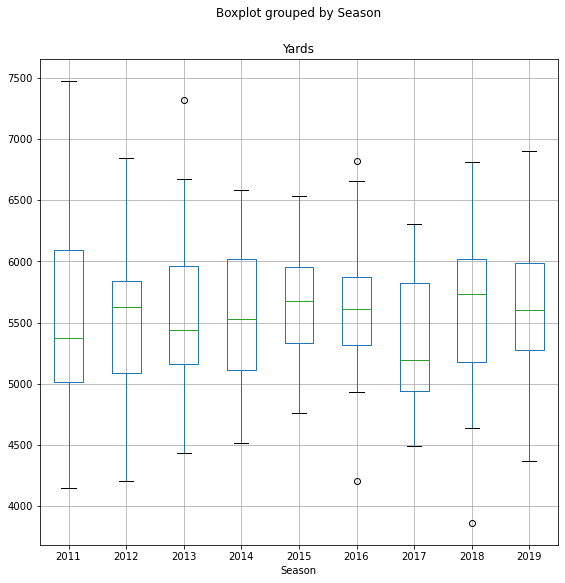

                 max
Tm                  
Denver Broncos  7317
                     max
Tm                      
New Orleans Saints  6816
                   min
Tm                    
Los Angeles Rams  4203
                    min
Tm                     
Arizona Cardinals  3865


In [103]:
#Detect outlier for Points 
#modern.boxplot(column='Points',by='Season',figsize=(9,9))
#plt.show()


### Detect outlier for Yards. Boxplots shows the outler the print tells you who the outlier is


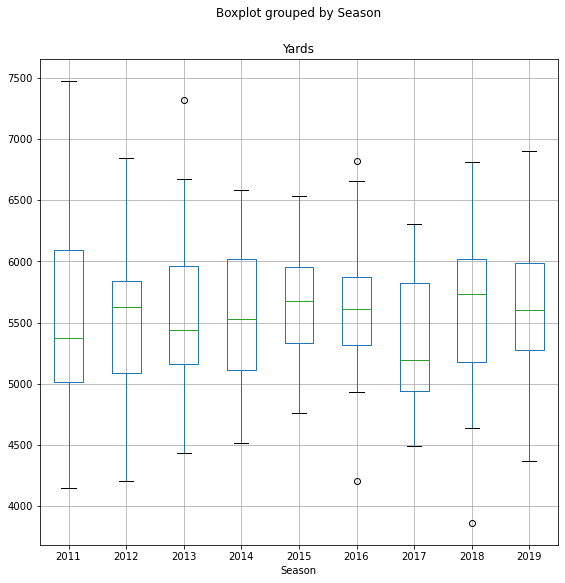

                 max
Tm                  
Denver Broncos  7317
                     max
Tm                      
New Orleans Saints  6816
                   min
Tm                    
Los Angeles Rams  4203
                    min
Tm                     
Arizona Cardinals  3865


In [105]:
modern.boxplot(column='Yards',by='Season',figsize=(9,9))
plt.show()
print(modern[modern.Season == 2013].groupby(['Tm']).Yards.agg(['max']).nlargest(1,'max'))
print(modern[modern.Season == 2016].groupby(['Tm']).Yards.agg(['max']).nlargest(1,'max'))
print(modern[modern.Season == 2016].groupby(['Tm']).Yards.agg(['min']).nsmallest(1,'min'))
print(modern[modern.Season == 2018].groupby(['Tm']).Yards.agg(['min']).nsmallest(1,'min'))

### Detect outlier for Passing Yards. Boxplots shows the outler the print tells you who the outlier is


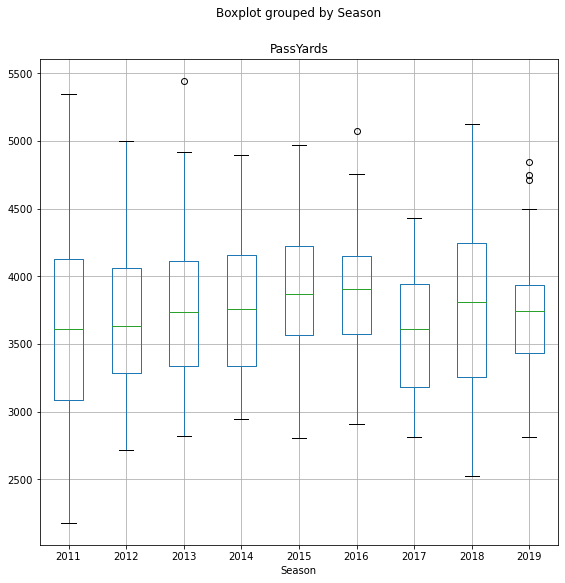

                 max
Tm                  
Denver Broncos  5444
                     max
Tm                      
New Orleans Saints  5074
                       max
Tm                        
Tampa Bay Buccaneers  4845
Dallas Cowboys        4751
Atlanta Falcons       4714


In [106]:
modern.boxplot(column='PassYards',by='Season',figsize=(9,9))
plt.show()
print(modern[modern.Season == 2013].groupby(['Tm']).PassYards.agg(['max']).nlargest(1,'max'))
print(modern[modern.Season == 2016].groupby(['Tm']).PassYards.agg(['max']).nlargest(1,'max'))
print(modern[modern.Season == 2019].groupby(['Tm']).PassYards.agg(['max']).nlargest(3,'max'))

### Detect outlier for Rushing Yards Boxplots shows the outler the print tells you who the outlier is


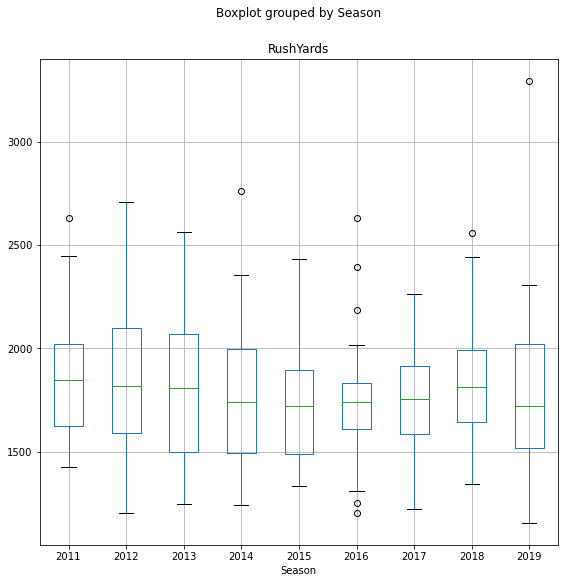

                 max
Tm                  
Denver Broncos  2632
                   max
Tm                    
Seattle Seahawks  2762
                   max
Tm                    
Buffalo Bills     2630
Dallas Cowboys    2396
Tennessee Titans  2187
                    min
Tm                     
Minnesota Vikings  1205
Los Angeles Rams   1252
                   max
Tm                    
Seattle Seahawks  2560
                   max
Tm                    
Baltimore Ravens  3296


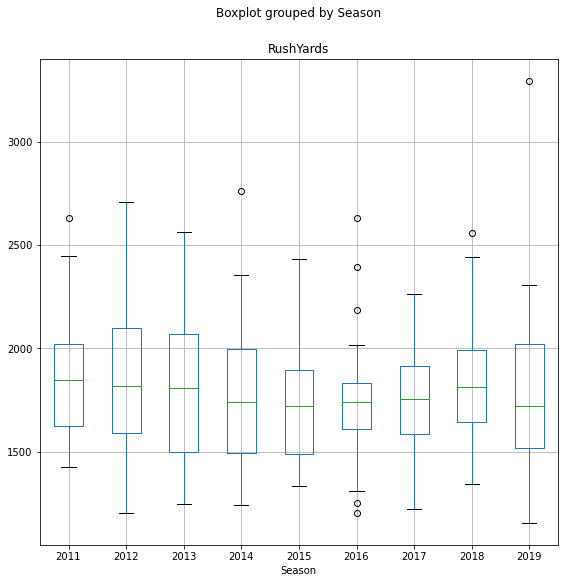

                 max
Tm                  
Denver Broncos  2632
                   max
Tm                    
Seattle Seahawks  2762
                   max
Tm                    
Buffalo Bills     2630
Dallas Cowboys    2396
Tennessee Titans  2187
                    min
Tm                     
Minnesota Vikings  1205
Los Angeles Rams   1252
                   max
Tm                    
Seattle Seahawks  2560
                   max
Tm                    
Baltimore Ravens  3296


In [108]:
modern.boxplot(column='RushYards',by='Season',figsize=(9,9))
plt.show()
print(modern[modern.Season == 2011].groupby(['Tm']).RushYards.agg(['max']).nlargest(1,'max'))
print(modern[modern.Season == 2014].groupby(['Tm']).RushYards.agg(['max']).nlargest(1,'max'))
print(modern[modern.Season == 2016].groupby(['Tm']).RushYards.agg(['max']).nlargest(3,'max'))
print(modern[modern.Season == 2016].groupby(['Tm']).RushYards.agg(['min']).nsmallest(2,'min'))
print(modern[modern.Season == 2018].groupby(['Tm']).RushYards.agg(['max']).nlargest(1,'max'))
print(modern[modern.Season == 2019].groupby(['Tm']).RushYards.agg(['max']).nlargest(1,'max'))#Detect outlier for Rushing Yards Boxplots shows the outler the print tells you who the outlier is
modern.boxplot(column='RushYards',by='Season',figsize=(9,9))
plt.show()
print(modern[modern.Season == 2011].groupby(['Tm']).RushYards.agg(['max']).nlargest(1,'max'))
print(modern[modern.Season == 2014].groupby(['Tm']).RushYards.agg(['max']).nlargest(1,'max'))
print(modern[modern.Season == 2016].groupby(['Tm']).RushYards.agg(['max']).nlargest(3,'max'))
print(modern[modern.Season == 2016].groupby(['Tm']).RushYards.agg(['min']).nsmallest(2,'min'))
print(modern[modern.Season == 2018].groupby(['Tm']).RushYards.agg(['max']).nlargest(1,'max'))
print(modern[modern.Season == 2019].groupby(['Tm']).RushYards.agg(['max']).nlargest(1,'max'))

### Extract the super bowl winners during the super bowl era

In [109]:
superBowl = pd.read_csv('NFL_SeasonResults.csv')
superBowl = superBowl[(superBowl.Season >=2011) & (superBowl.Week == 'SuperBowl')]
superBowl = suserBowl[(superBowl.Result) == 'W']
superBowl.sort_values(by=['Season'],inplace=True)
superBowl = superBowl.reset_index(drop=True)
superBowl = superBowl[['TeamID','Season']]
print(superBowl)

     TeamID  Season
0    Giants    2011
1    Ravens    2012
2  Seahawks    2013
3  Patriots    2014
4   Broncos    2015
5  Patriots    2016
6    Eagles    2017
7  Patriots    2018
8    Chiefs    2019


### Use list from above as info to get full season results and stats for Super Bowl winners


In [110]:
superBowl_profiles = pd.read_csv('NFL_SeasonResults.csv')
superBowl_profiles = superBowl_profiles[(superBowl_profiles.Season >=2011)]

In [111]:
superBowl_profiles

,Column1,TeamID,Season,Week,Day,Date,Time,Result,OT,Record,...,Off1stDowns,OffYards,OffPass,OffRush,OffTO,Def1stDowns,DefYards,DeffPass,DefRush,DefTO
751,247,FortyNiners,2011,1,Sun,9/11/2020,4:22PM ET,W,NaN,1-0,...,12.0,209.0,124.0,85.0,0,18.0,219.0,155.0,64.0,3
752,345,FortyNiners,2011,2,Sun,9/18/2020,4:05PM ET,L,OT,1-1,...,14.0,206.0,132.0,74.0,1,20.0,472.0,427.0,45.0,2
753,445,FortyNiners,2011,3,Sun,9/25/2020,1:02PM ET,W,NaN,2-1,...,16.0,226.0,176.0,50.0,1,14.0,228.0,149.0,79.0,3
754,545,FortyNiners,2011,4,Sun,10/2/2020,1:03PM ET,W,NaN,3-1,...,22.0,442.0,278.0,164.0,1,23.0,513.0,405.0,108.0,3
755,645,FortyNiners,2011,5,Sun,10/9/2020,4:05PM ET,W,NaN,4-1,...,28.0,418.0,205.0,213.0,1,14.0,272.0,186.0,86.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26364,164026,Vikings,2019,15,Sun,12/15/2020,4:05PM ET,W,NaN,10-4,...,18.0,344.0,207.0,137.0,1,17.0,345.0,283.0,62.0,7
26365,17482,Vikings,2019,16,Mon,12/23/2020,8:15PM ET,L,NaN,10-5,...,7.0,139.0,82.0,57.0,1,22.0,383.0,199.0,184.0,3
26366,183510,Vikings,2019,17,Sun,12/29/2020,1:00PM ET,L,NaN,10-6,...,14.0,300.0,126.0,174.0,3,24.0,337.0,179.0,158.0,1
26367,201512,Vikings,2019,Wild Card,Sun,1/5/2020,1:05PM ET,W,OT,11-6,...,22.0,362.0,226.0,136.0,1,19.0,324.0,227.0,97.0,2
